In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
l = list(Path("./data/ran_data/rest-1400/").glob("*filtered.1D"))

In [3]:
hz = 1/(1.4/16)

In [4]:
def extract_max_freq(resp_trace, sampling_rate):
    fourier_transform = np.fft.rfft(resp_trace)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))
    assert len(power_spectrum) == len(frequency)
    #plt.plot(frequency, power_spectrum)
    #plt.xlim(0, 1)
    #plt.show()
    return frequency[np.argmax(power_spectrum)]

In [5]:
df_list = []
for i in l:
    subj, sess, task, imtype, _, _ = i.name.split("_")
    max_freq = extract_max_freq(np.genfromtxt(i), hz)
    df_list.append({
        "subj":subj,
        "sess":sess,
        "task":task,
        "imtype":imtype,
        "max_freq":max_freq
    })

In [6]:
df = pd.DataFrame(df_list)

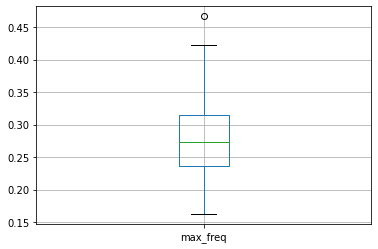

In [7]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50eeafc400>]],
      dtype=object)

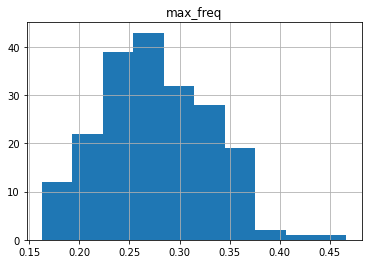

In [8]:
df.hist()

In [9]:
physio_files = list(Path("/home/rlim/proj/run_3dretroicor/data/physio_files_raw").glob("*rest_acq-1400*tsv"))

In [10]:
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


In [11]:
phys_list = []
for physio_file in physio_files:
    f = np.genfromtxt(physio_file)
    subj, sess, task, imtype, _, _ = physio_file.name.split("_")
    f = f-f.mean()
    max_freq_orig = extract_max_freq(f, 62.5)
    f = butter_bandpass_filter(f, 0.15, 0.6, 62.5)
    max_freq = extract_max_freq(f, 62.5)
    phys_list.append({
        "subj":subj,
        "sess":sess,
        "task":task,
        "imtype":imtype,
        "max_freq":max_freq,
        "max_freq_orig": max_freq_orig
    })

In [12]:
phys = pd.DataFrame(phys_list)

In [13]:
phys.head()

,subj,sess,task,imtype,max_freq,max_freq_orig
0,sub-A00028694,ses-BAS1,task-rest,acq-1400,0.371287,0.371287
1,sub-A00044370,ses-BAS1,task-rest,acq-1400,0.286421,0.286421
2,sub-A00037125,ses-BAS1,task-rest,acq-1400,0.355375,0.001768
3,sub-A00034987,ses-BAS1,task-rest,acq-1400,0.291726,0.291726
4,sub-A00082590,ses-BAS1,task-rest,acq-1400,0.247525,0.247525


In [14]:
merged = df.merge(phys, on=["subj", "sess", "task", "imtype"])

In [15]:
len(df), len(merged), len(phys)

(199, 187, 2172)

In [16]:
merged.columns = ["subj", "sess", "task", "imtype", "predicted", "phys_record", "max_freq_orig"]

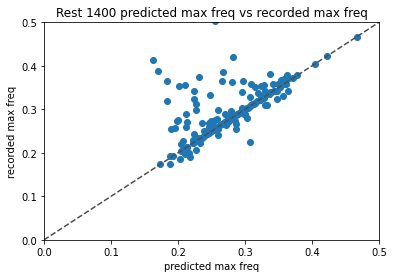

In [17]:
plt.scatter(merged.predicted, merged.phys_record)
plt.plot([-0, 1], [-0, 1], ls="--", c=".3")
plt.ylim(0, 0.5)
plt.xlim(0, 0.5)
plt.xlabel("predicted max freq")
plt.ylabel("recorded max freq")
plt.title("Rest 1400 predicted max freq vs recorded max freq")
plt.show()


In [18]:
hz_645 = 1/(0.645/10)

In [19]:
l = list(Path("./data/ran_data/rest-645/").glob("*filtered.1D"))
for i in l:
    subj, sess, task, imtype, _, _ = i.name.split("_")
    max_freq = extract_max_freq(np.genfromtxt(i), hz_645)
    df_list.append({
        "subj":subj,
        "sess":sess,
        "task":task,
        "imtype":imtype,
        "max_freq":max_freq
    })
physio_files = list(Path("/home/rlim/proj/run_3dretroicor/data/physio_files_raw").glob("*rest_acq-645*tsv"))
for physio_file in physio_files:
    f = np.genfromtxt(physio_file)
    subj, sess, task, imtype, _, _ = physio_file.name.split("_")
    f = f-f.mean()
    max_freq_orig = extract_max_freq(f, 62.5)
    f = butter_bandpass_filter(f, 0.15, 0.6, 62.5)
    max_freq = extract_max_freq(f, 62.5)
    phys_list.append({
        "subj":subj,
        "sess":sess,
        "task":task,
        "imtype":imtype,
        "max_freq":max_freq,
        "max_freq_orig":max_freq_orig
    })

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50ebb88f28>,
      dtype=object)

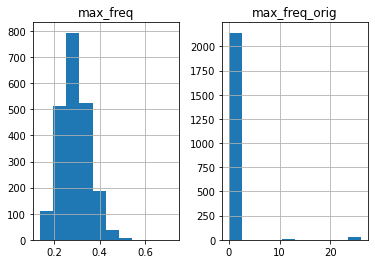

In [20]:
phys.hist()

In [21]:
phys = pd.DataFrame(phys_list)
df = pd.DataFrame(df_list)

In [22]:
merged = df.merge(phys, on=["subj", "sess", "task", "imtype"])
merged.columns = ["subj", "sess", "task", "imtype", "predicted", "phys_record", "max_freq_orig"]

In [23]:
set(merged.imtype)

{'acq-1400', 'acq-645'}

In [24]:
rest_1400 = merged[merged.imtype=="acq-1400"]
rest_645 = merged[merged.imtype=="acq-645"]

In [25]:
rest_1400

,subj,sess,task,imtype,predicted,phys_record,max_freq_orig
0,sub-A00056097,ses-BAS1,task-rest,acq-1400,0.328854,0.328854,0.328854
1,sub-A00031881,ses-BAS1,task-rest,acq-1400,0.259901,0.254597,0.254597
2,sub-A00083162,ses-FLU1,task-rest,acq-1400,0.252829,0.252829,0.252829
3,sub-A00039635,ses-BAS1,task-rest,acq-1400,0.205092,0.205092,0.042433
4,sub-A00063589,ses-BAS1,task-rest,acq-1400,0.318246,0.318246,0.318246
...,...,...,...,...,...,...,...
182,sub-A00055352,ses-BAS1,task-rest,acq-1400,0.204082,0.219236,0.219236
183,sub-A00066584,ses-TRT,task-rest,acq-1400,0.243989,0.243989,0.243989
184,sub-A00081725,ses-BAS1,task-rest,acq-1400,0.252829,0.252829,0.252829
185,sub-A00058229,ses-TRT,task-rest,acq-1400,0.196252,0.256365,0.001768


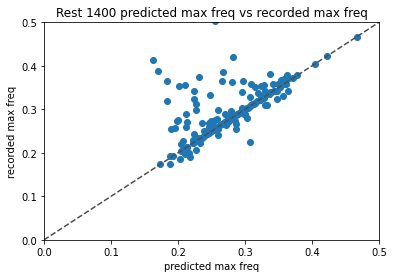

In [26]:
plt.scatter(rest_1400.predicted, rest_1400.phys_record)
plt.plot([-0, 1], [-0, 1], ls="--", c=".3")
plt.ylim(0, 0.5)
plt.xlim(0, 0.5)
plt.xlabel("predicted max freq")
plt.ylabel("recorded max freq")
plt.title("Rest 1400 predicted max freq vs recorded max freq")
plt.savefig("rest_1400_pred.png")
plt.show()


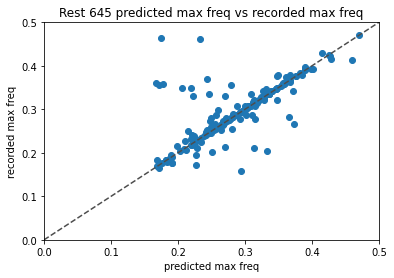

In [27]:
plt.scatter(rest_645.predicted, rest_645.phys_record)
plt.plot([-0, 1], [-0, 1], ls="--", c=".3")
plt.ylim(0, 0.5)
plt.xlim(0, 0.5)
plt.xlabel("predicted max freq")
plt.ylabel("recorded max freq")
plt.title("Rest 645 predicted max freq vs recorded max freq")
plt.savefig("rest_645_pred.png")
plt.show()


In [28]:
rest_1400.corr()

,predicted,phys_record,max_freq_orig
predicted,1.000000,0.646524,-0.047246
phys_record,0.646524,1.000000,-0.103610
max_freq_orig,-0.047246,-0.103610,1.000000


In [29]:
rest_645.corr()

,predicted,phys_record,max_freq_orig
predicted,1.000000,0.735565,0.400834
phys_record,0.735565,1.000000,0.300623
max_freq_orig,0.400834,0.300623,1.000000


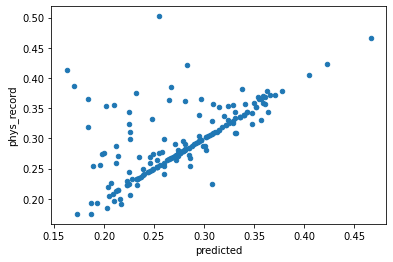

In [30]:
rest_1400[(rest_1400.phys_record > .15) & (rest_1400.phys_record < 1)].plot.scatter("predicted", "phys_record")

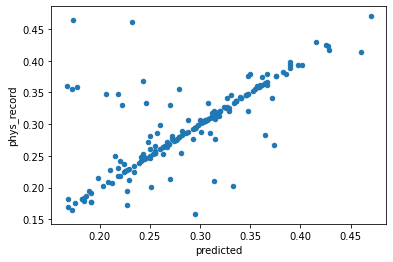

In [31]:
rest_645[(rest_645.phys_record > .15) & (rest_645.phys_record < 1)].plot.scatter("predicted", "phys_record")

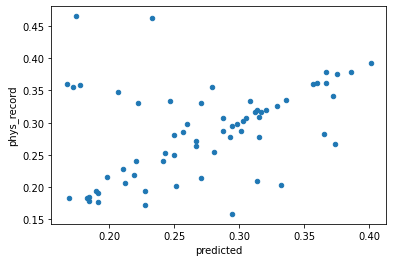

In [38]:
rest_645[rest_645.max_freq_orig<0.15].plot.scatter("predicted", "phys_record")

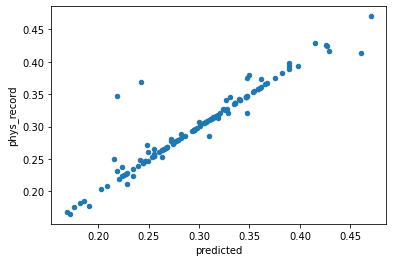

In [42]:
rest_645[rest_645.max_freq_orig>=0.15].plot.scatter("predicted", "phys_record")

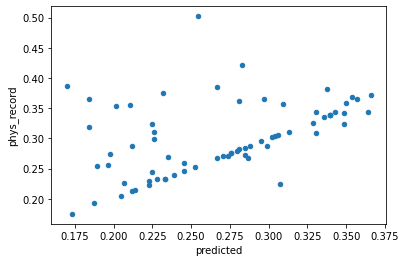

In [40]:
rest_1400[rest_1400.max_freq_orig<0.15].plot.scatter("predicted", "phys_record")

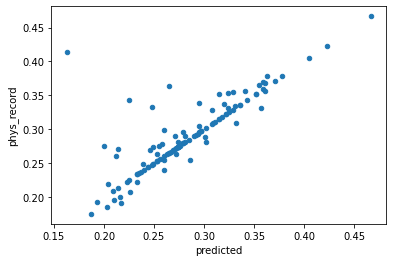

In [41]:
rest_1400[rest_1400.max_freq_orig>=0.15].plot.scatter("predicted", "phys_record")